###Agentes

En el contexto de la inteligencia artificial (IA), un **"agente"** se refiere a un sistema computacional que realiza acciones en un entorno para lograr objetivos específicos.

Estos agentes pueden ser cualquier entidad capaz de percibir su entorno, procesar información y tomar decisiones para alcanzar metas predefinidas.

Los agentes en IA suelen seguir el modelo de agente percibidor-actuador, que consta de cuatro componentes principales:

* **Sensores (Percibidores):** Estos son responsables de recoger información del entorno en el que opera el agente. Pueden incluir cámaras, micrófonos, sensores de temperatura, u otros dispositivos de entrada que permiten al agente percibir su entorno.

* **Programa del Agente:** Este componente es el núcleo del agente y está diseñado para procesar la información percibida y tomar decisiones. Puede ser un conjunto de algoritmos, reglas o modelos de aprendizaje automático, dependiendo de la complejidad y los requisitos de la tarea.

* **Actuadores:** Son responsables de ejecutar las acciones decididas por el programa del agente. Pueden incluir motores, parlantes, pantallas, o cualquier otro dispositivo de salida que permita al agente interactuar con su entorno.

* **Entorno:** Es el contexto en el que el agente opera y realiza sus acciones. El entorno puede ser el mundo físico, una simulación virtual, o cualquier otro espacio donde el agente pueda interactuar.

En resumen, un agente en IA es un sistema capaz de percibir su entorno, procesar información y tomar decisiones para lograr objetivos específicos, siendo una parte fundamental en el diseño y desarrollo de sistemas de inteligencia artificial.

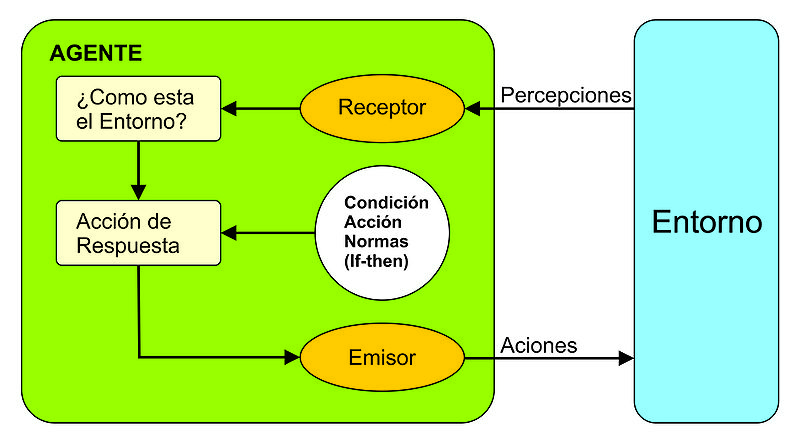

**Definición de la clase Square:**


def __init__(self, name):

self.name = name: Asigna el nombre del cuadrado al atributo name de la instancia.
self.dirt = 0: Inicializa el atributo dirt (suciedad) de la instancia en 0.
Los siguientes cuatro líneas (self.left = self, self.right = self, self.up = self, self.down = self) están configurando los cuadrados vecinos del objeto Square. En este caso, se están inicializando a sí mismos como vecinos. Puede ser modificado más adelante para indicar las conexiones entre los cuadrados.

Método __str__:

def __str__(self): Este método proporciona una representación de cadena de la instancia cuando se utiliza la función str().

return self.name: Devuelve el nombre del cuadrado como una cadena.

En resumen, esta clase Square representa un cuadrado en un ambiente, con atributos como el nombre y la suciedad. Además, se configuran las relaciones con cuadrados vecinos, aunque inicialmente se establecen como ellos mismos.





In [1]:
class Square(object):
    def __init__(self, name):
        """
        Crea un objeto square, que representa los cuadrados del ambiente.

        Argumentos
        ----------
        name : str
          Nombre del cuadrado ('A', 'B', etc.)
        """
        self.name = name
        self.dirt = 0

        # Hasta que no se coloque con cuadrados vecinos, los movimientos no llevan a ningún lado
        self.left = self
        self.right = self
        self.up = self
        self.down = self

    def __str__(self):
        return self.name

La clase llamada VacuumWorld que representa el entorno para un mundo de aspiradora.

Método __init__:

def __init__(self, dirt_init='random'): Constructor de la clase. Se ejecuta al crear una nueva instancia de la clase. Toma un parámetro opcional dirt_init, que determina cómo se inicializa la suciedad en los cuadrados (por defecto, de manera aleatoria).

Se crean instancias de la clase Square llamadas A, B, C y D para representar los cuadrados en el entorno. Estos se agregan a la lista self.squares.
Método initialize_dirt:

def initialize_dirt(self):: Inicializa la suciedad de los cuadrados según la opción seleccionada en dirt_init.
Si dirt_init es 'random', la suciedad se establece aleatoriamente en cada cuadrado.
Si dirt_init es 'dirty', ambos cuadrados se inicializan como sucios.
Si dirt_init es una lista, se asigna la suciedad de cada cuadrado según los valores de la lista.

En resumen, esta clase VacuumWorld crea un entorno con cuatro cuadrados (A, B, C, D) y proporciona métodos para inicializar y representar la suciedad en esos cuadrados. La suciedad se puede inicializar de forma aleatoria, con ambos cuadrados sucios, o con una configuración personalizada mediante una lista.
Se configuran las relaciones vecinales entre los cuadrados, según el diseño del entorno.

Se llama al método initialize_dirt para inicializar la suciedad.



In [2]:
import random

class VacuumWorld(object):
    def __init__(self, dirt_init='random'):
        """
        Objeto que crea el ambiente para el mundo de la aspiradora:
        Se conforma de:
        - Dos cuadrados: A y B (A a la izquierda de B)
        - Indicación de la limpieza (0) o suciedad (1) de los cuadrados.

        Argumentos
        ----------
        dirt_init : str
          Forma en que se inicializará la suciedad de los cuadrados.
        """
        self.squares = []
        self.A,self.B,self.C,self.D = Square('A'),Square('B'),Square('C'),Square('D')
        self.squares.append(self.A)
        self.squares.append(self.B)
        self.squares.append(self.C)
        self.squares.append(self.D)

        #Configuración de los cuartos
        self.A.left,self.A.right,self.A.up,self.A.down = self.A,self.B,self.A,self.C
        self.B.left,self.B.right,self.B.up,self.B.down = self.A,self.B,self.B,self.D
        self.C.left,self.C.right,self.C.up,self.C.down = self.C,self.D,self.A,self.C
        self.D.left,self.D.right,self.D.up,self.D.down = self.C,self.D,self.B,self.D

        #Inicialización de suciedad
        self.dirt_init = dirt_init
        self.initialize_dirt()

    def __str__(self):
        return '[({},{}) ({},{})]\n[({},{}) ({},{})]'.format(self.A.name,self.A.dirt, self.B.name,self.B.dirt,
                                                   self.C.name,self.C.dirt, self.D.name,self.D.dirt)

    def initialize_dirt(self):
        """
        Inicializa la suciedad de los cuadrados:

        Opciones (se indican en init)
        --------
        random : Inicializa con uno de los cuadrados sucios y otro limpio de forma aleatoria.
        dirty : Inicializa con los dos cuadrados sucios
        clean : Inicializa con los dos cuadrados limpios
        """
        if self.dirt_init=='random':
            for square in self.squares:
                if random.random() > 0.5:
                    square.dirt = 1
                else:
                    square.dirt = 0

        elif self.dirt_init=='dirty':
            for square in self.squares:
                square.dirt = 1

        else:
            for square, value in zip(self.squares, self.dirt_init):
                square.dirt = value

env = VacuumWorld(dirt_init='random'): Crea una nueva instancia de la clase VacuumWorld con la opción dirt_init establecida en 'random'. Esto significa que la suciedad en los cuadrados se inicializará aleatoriamente.

Cuando se ejecuta el código se mostrara la salida que muestra el estado inicial del entorno de la aspiradora con los cuadrados A, B, C y D, y la suciedad asignada aleatoriamente en cada cuadrado.



In [3]:
env = VacuumWorld(dirt_init='random')
print(env)

[(A,0) (B,0)]
[(C,0) (D,1)]


Dada línea representa dos cuadrados, mostrando el nombre del cuadrado y su estado de suciedad (0 para limpio, 1 para sucio). Como se inicializa de manera aleatoria, los valores exactos pueden variar cada vez que ejecutas el código.

Se define una clase llamada Agent que representa un agente aspiradora en el contexto del mundo de la aspiradora (VacuumWorld).

class Agent(VacuumWorld):: La clase Agent hereda de la clase VacuumWorld, lo que significa que tiene todas las propiedades y métodos de VacuumWorld.

Método act:

def act(self, action):: Método que permite al agente realizar acciones. Toma un parámetro action que representa la acción que el agente debe realizar.
Si la acción es 'Clean', el agente limpia el cuadrado en el que se encuentra, estableciendo el estado de suciedad a 0, y registra la percepción actual.
Si la acción es 'Left', 'Right', 'Up' o 'Down', el agente se mueve en la dirección correspondiente, actualizando su ubicación y registrando la nueva percepción.

Si la acción no está entre las permitidas, imprime un mensaje indicando que no es una acción permitida.
En resumen, esta clase Agent modela un agente aspiradora que puede realizar acciones como limpiar o moverse en las cuatro direcciones dentro de un entorno (VacuumWorld). Además, el agente mantiene una secuencia de percepciones basadas en su ubicación y el estado de suciedad de los cuadrados en el entorno.

In [4]:
class Agent(VacuumWorld):
    """
    Agente de aspiradora. Cuyas acciones son limpiar, o moverse en las cuatro direcciones.
    Asimismo, el agente guarda una secuencia de percepciones.
    """
    def __init__(self, location=None):
        self.location = location
        self.perceptions = [(self.location.name, self.location.dirt)]

    def act(self,action):
        """Función para actuar"""
        if action == 'Clean':
            self.location.dirt = 0
            self.perceptions.append((self.location.name,self.location.dirt))
        elif action == 'Left':
            self.location = self.location.left
            self.perceptions.append((self.location.name,self.location.dirt))
        elif action == 'Right':
            self.location = self.location.right
            self.perceptions.append((self.location.name,self.location.dirt))
        elif action == 'Up':
            self.location = self.location.up
            self.perceptions.append((self.location.name,self.location.dirt))
        elif action == 'Down':
            self.location = self.location.down
            self.perceptions.append((self.location.name,self.location.dirt))
        else:
            print('No es una acción permitida')

agent = Agent(location=env.A): Crea una nueva instancia del agente (Agent) y establece su ubicación inicial en el cuadrado A del entorno env.

In [5]:
agent = Agent(location=env.A)
print(env)
print(agent.location)

[(A,0) (B,0)]
[(C,0) (D,1)]
A


agent.act(action='Clean'): El agente realiza la acción 'Clean', que limpia el cuadrado en el que se encuentra. Esto establecerá la suciedad en ese cuadrado a 0 y actualizará las percepciones del agente.

print('Ambiente después de la acción:\n{} {}'.format(env, agent.location)): Imprime el estado del entorno y la ubicación del agente después de la acción 'Clean'.

El mismo patrón se repite para las siguientes acciones:

In [6]:
agent.act(action='Clean')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Right')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Clean')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Down')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Clean')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Left')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))
agent.act(action='Clean')
print('Ambiente después de la acción:\n{} {}'.format(env,agent.location))

Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,1)] A
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,1)] B
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,1)] B
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,1)] D
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,0)] D
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,0)] C
Ambiente después de la acción:
[(A,0) (B,0)]
[(C,0) (D,0)] C



El código print(agent.perceptions) imprime la secuencia de percepciones del agente. La secuencia de percepciones se actualiza cada vez que el agente realiza una acción. Cada percepción en la secuencia está representada como una tupla que contiene el nombre del cuadrado y el estado de suciedad del mismo en el momento de la percepción.

In [7]:
print(agent.perceptions)

[('A', 0), ('A', 0), ('B', 0), ('B', 0), ('D', 1), ('D', 0), ('C', 0), ('C', 0)]
